# Explore here

In [8]:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import utils as Funcion


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep = ";")

total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
total_data.shape

(1599, 12)

In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


existe un total de 1599 filas y 12 columnas, no se aprecia que las columnas tengan nulos.
Todas las columnas son numericas.

In [36]:
total_data.duplicated().sum()
total_data = total_data.drop_duplicates()
total_data.shape

(1359, 12)

In [37]:
total_data.quality.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

Analisis de variables categoricas: ["quality"]

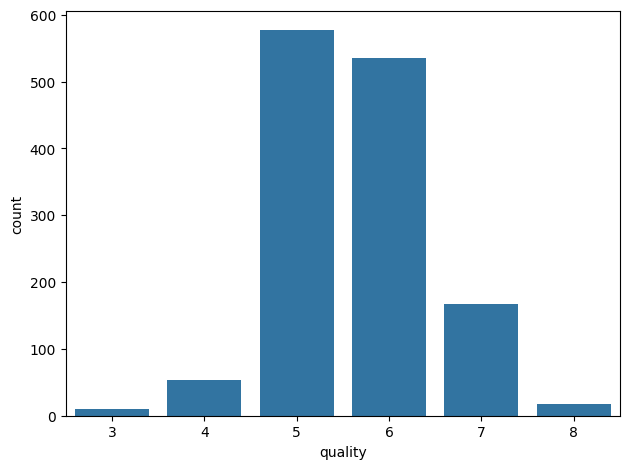

In [41]:

sns.countplot(data = total_data, x = "quality", legend=False)

plt.tight_layout()


plt.show()

In [42]:
def group_quality(quality):
    if quality < 5:
        return 0
    elif quality < 7:
        return 1
    else:
        return 2

total_data= total_data.copy()
total_data.loc[:, "quality_label"] = total_data["quality"].apply(group_quality)
total_data = total_data.drop("quality", axis=1)

total_data["quality_label"].value_counts()

quality_label
1    1112
2     184
0      63
Name: count, dtype: int64

In [43]:
total_data[total_data["quality_label"] == 1].shape[0] / total_data.shape[0]

0.8182487122884474

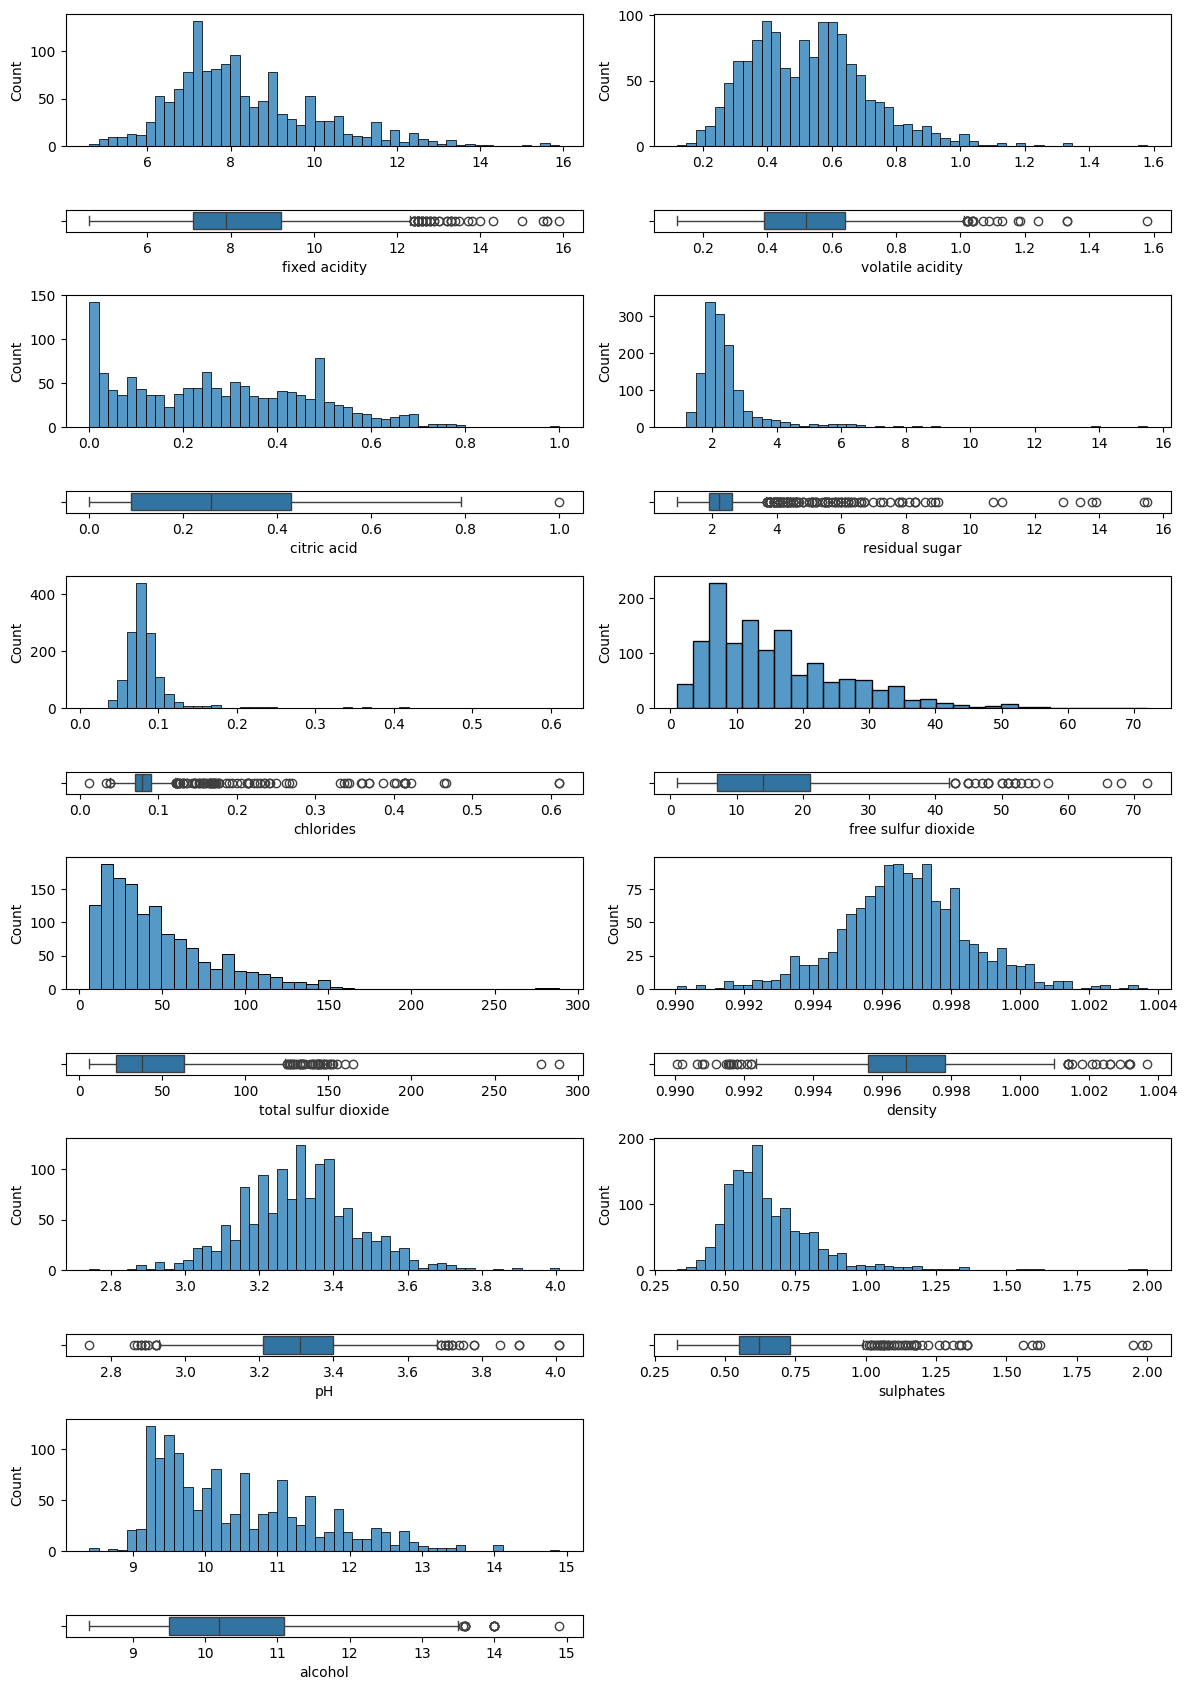

In [46]:
fig, axis = plt.subplots(12, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = total_data, x = "fixed acidity", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "fixed acidity").set(xlabel = "fixed acidity")

sns.histplot(ax = axis[0, 1], data = total_data, x = "volatile acidity", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "volatile acidity").set(xlabel = "volatile acidity")

sns.histplot(ax = axis[2, 0], data = total_data, x = "citric acid", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "citric acid").set(xlabel = "citric acid")

sns.histplot(ax = axis[2, 1], data = total_data, x = "residual sugar", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "residual sugar").set(xlabel = "residual sugar")

sns.histplot(ax = axis[4, 0], data = total_data, x = "chlorides", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = total_data, x = "chlorides").set(xlabel = "chlorides")

sns.histplot(ax = axis[4, 1], data = total_data, x = "free sulfur dioxide").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = total_data, x = "free sulfur dioxide").set(xlabel = "free sulfur dioxide")

sns.histplot(ax = axis[6, 0], data = total_data, x = "total sulfur dioxide").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = total_data, x = "total sulfur dioxide").set(xlabel = "total sulfur dioxide")

sns.histplot(ax = axis[6, 1], data = total_data, x = "density", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = total_data, x = "density").set(xlabel = "density")

sns.histplot(ax = axis[8, 0], data = total_data, x = "pH", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = total_data, x = "pH").set(xlabel = "pH")

sns.histplot(ax = axis[8, 1], data = total_data, x = "sulphates", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = total_data, x = "sulphates").set(xlabel = "sulphates")

sns.histplot(ax = axis[10, 0], data = total_data, x = "alcohol", bins=50).set(xlabel = None)
sns.boxplot(ax = axis[11, 0], data = total_data, x = "alcohol").set(xlabel = "alcohol")

axis[10, 1].axis("off")
axis[11, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

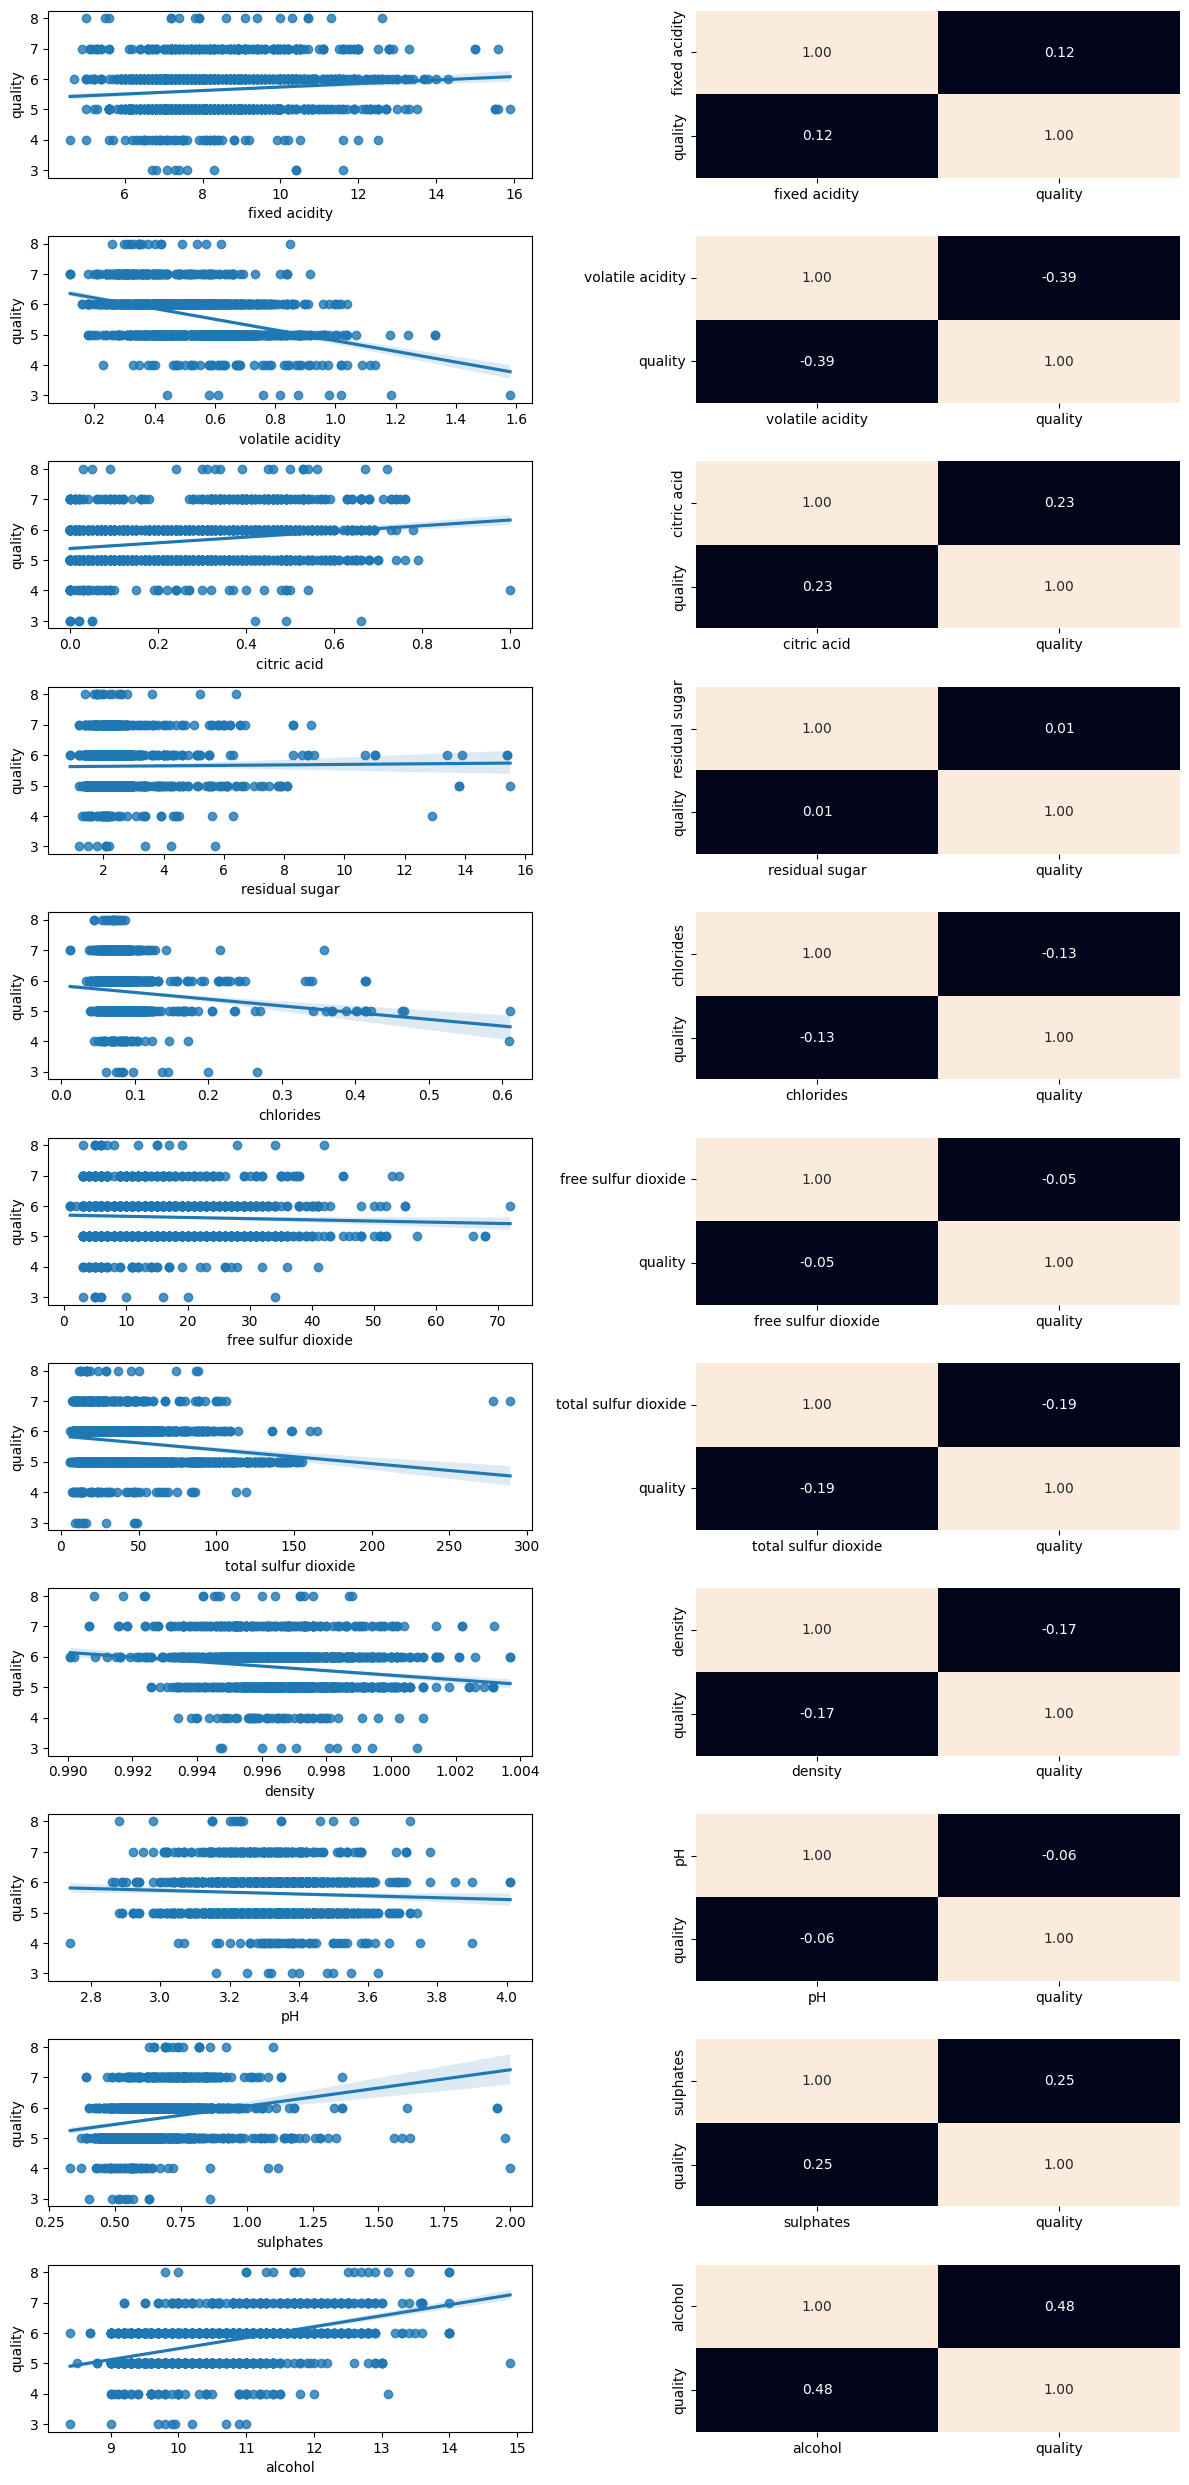

In [23]:
fig, axis = plt.subplots(11, 2, figsize=(12, 25))

sns.regplot(ax=axis[0, 0], data=total_data, x="fixed acidity", y="quality")
sns.heatmap(total_data[["fixed acidity", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

sns.regplot(ax=axis[1, 0], data=total_data, x="volatile acidity", y="quality")
sns.heatmap(total_data[["volatile acidity", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="citric acid", y="quality")
sns.heatmap(total_data[["citric acid", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

sns.regplot(ax=axis[3, 0], data=total_data, x="residual sugar", y="quality")
sns.heatmap(total_data[["residual sugar", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[4, 0], data=total_data, x="chlorides", y="quality")
sns.heatmap(total_data[["chlorides", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)

sns.regplot(ax=axis[5, 0], data=total_data, x="free sulfur dioxide", y="quality")
sns.heatmap(total_data[["free sulfur dioxide", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(ax=axis[6, 0], data=total_data, x="total sulfur dioxide", y="quality")
sns.heatmap(total_data[["total sulfur dioxide", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[6, 1], cbar=False)

sns.regplot(ax=axis[7, 0], data=total_data, x="density", y="quality")
sns.heatmap(total_data[["density", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[7, 1], cbar=False)

sns.regplot(ax=axis[8, 0], data=total_data, x="pH", y="quality")
sns.heatmap(total_data[["pH", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[8, 1], cbar=False)

sns.regplot(ax=axis[9, 0], data=total_data, x="sulphates", y="quality")
sns.heatmap(total_data[["sulphates", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[9, 1], cbar=False)

sns.regplot(ax=axis[10, 0], data=total_data, x="alcohol", y="quality")
sns.heatmap(total_data[["alcohol", "quality"]].corr(), annot=True, fmt=".2f", ax=axis[10, 1], cbar=False)


plt.tight_layout()
plt.show()

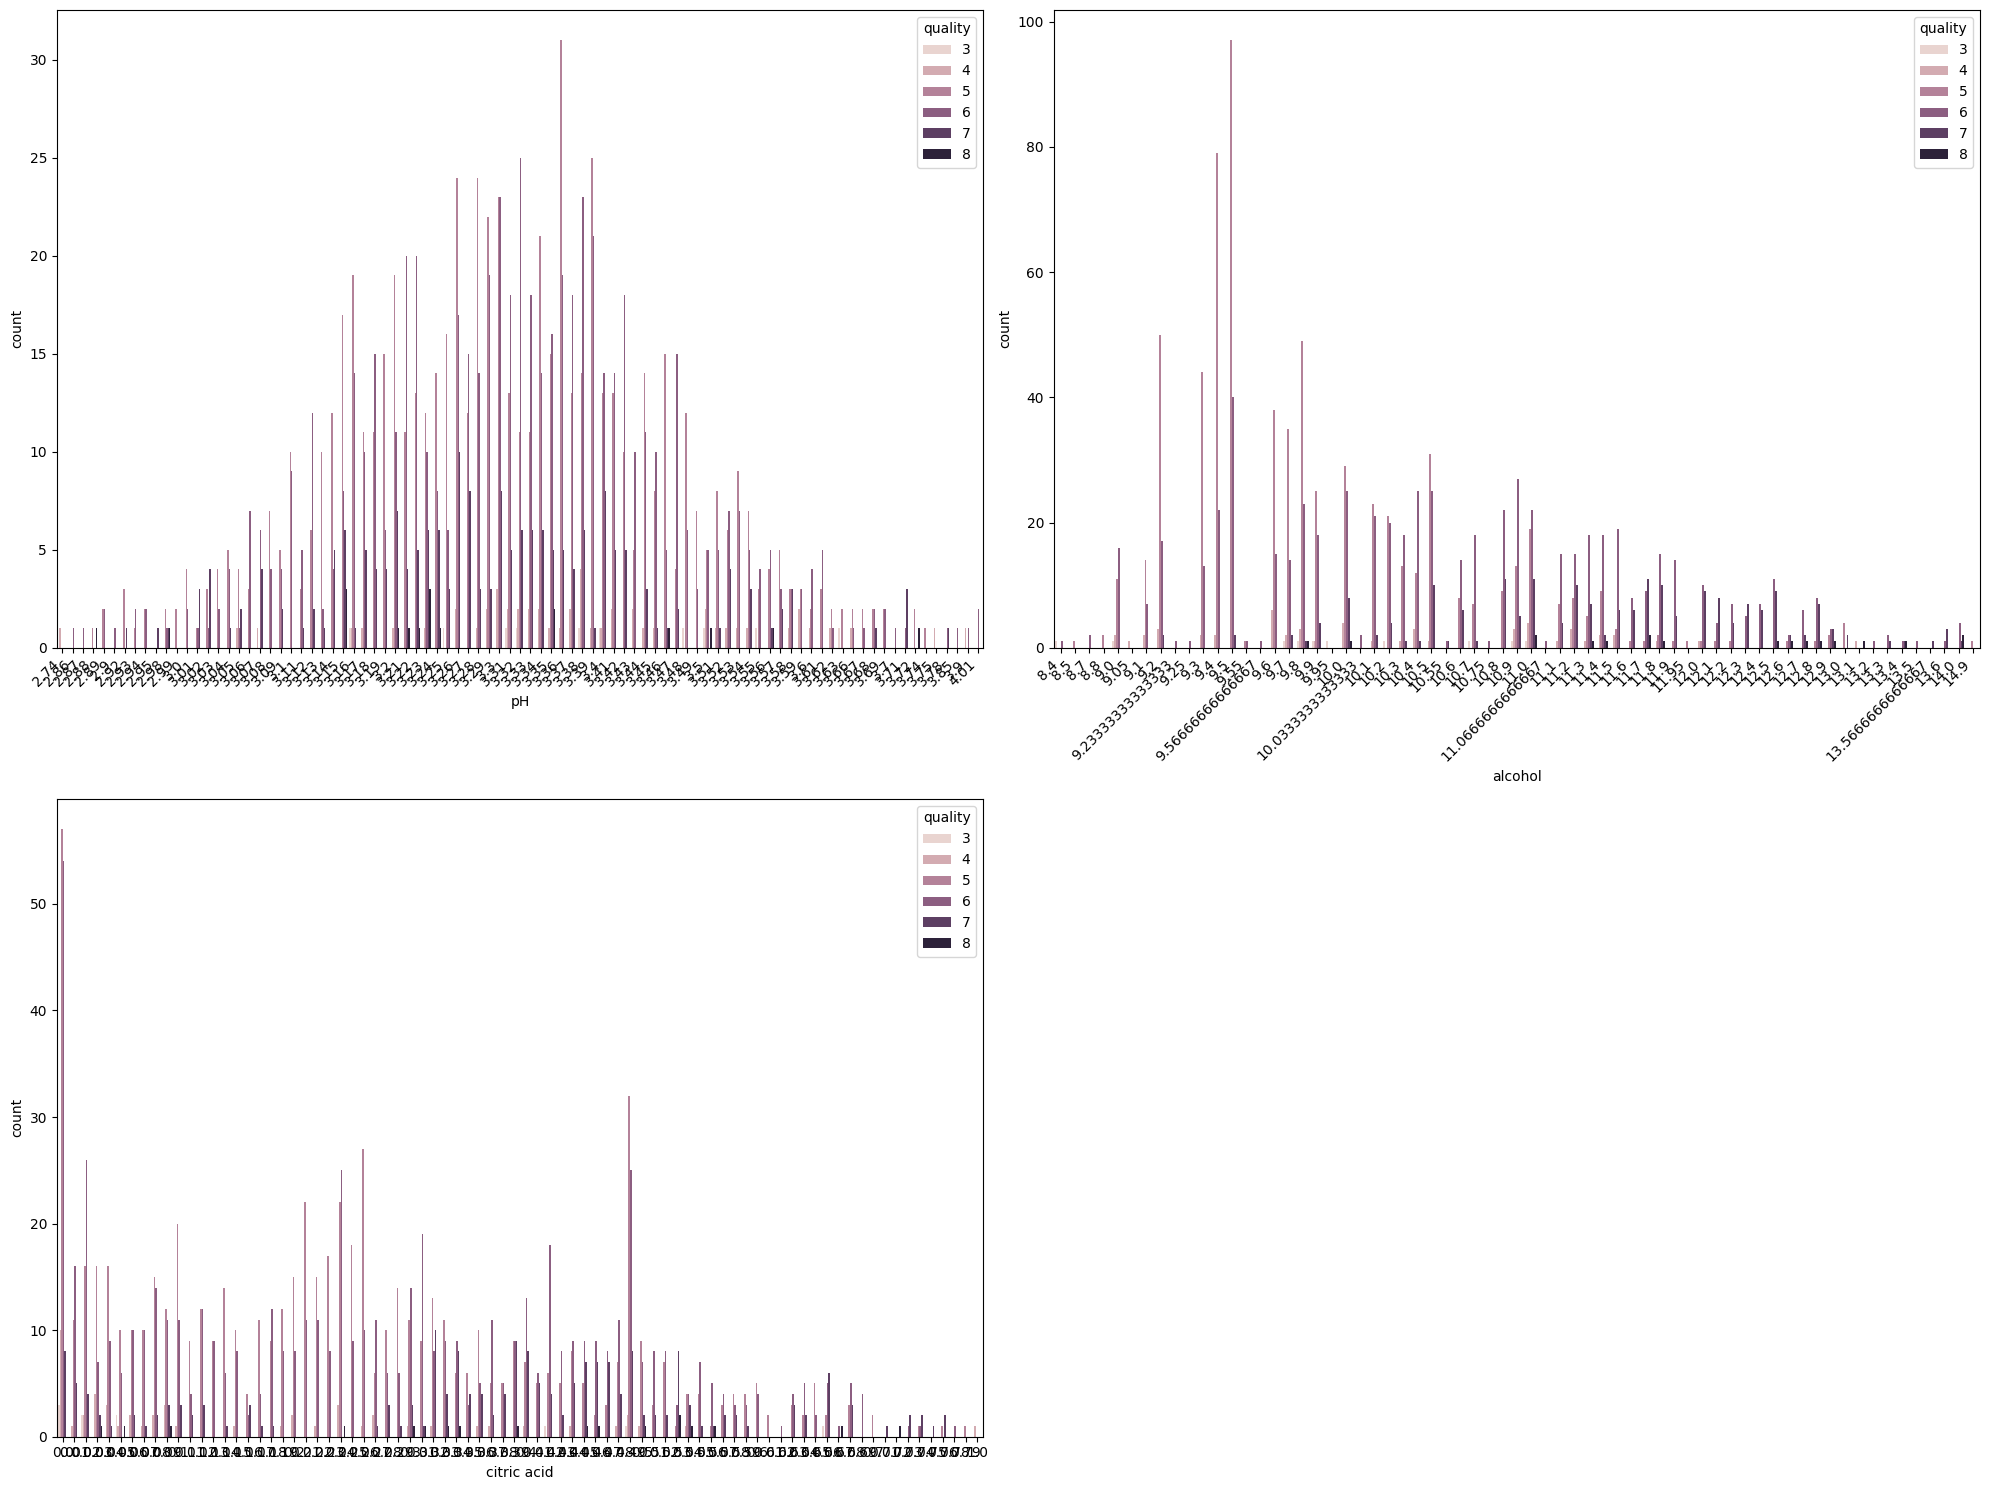

In [27]:
fig, axis = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(ax = axis[0, 0], data = total_data, x = "pH", hue = "quality")
sns.countplot(ax = axis[0, 1], data = total_data, x = "alcohol", hue = "quality")
sns.countplot(ax = axis[1, 0], data = total_data, x = "citric acid", hue = "quality")

plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,1].get_xticklabels(), rotation=45, ha='right')


fig.delaxes(axis[1, 1])

plt.tight_layout()


plt.show()

Combinaciones de la clase con varias predictoras

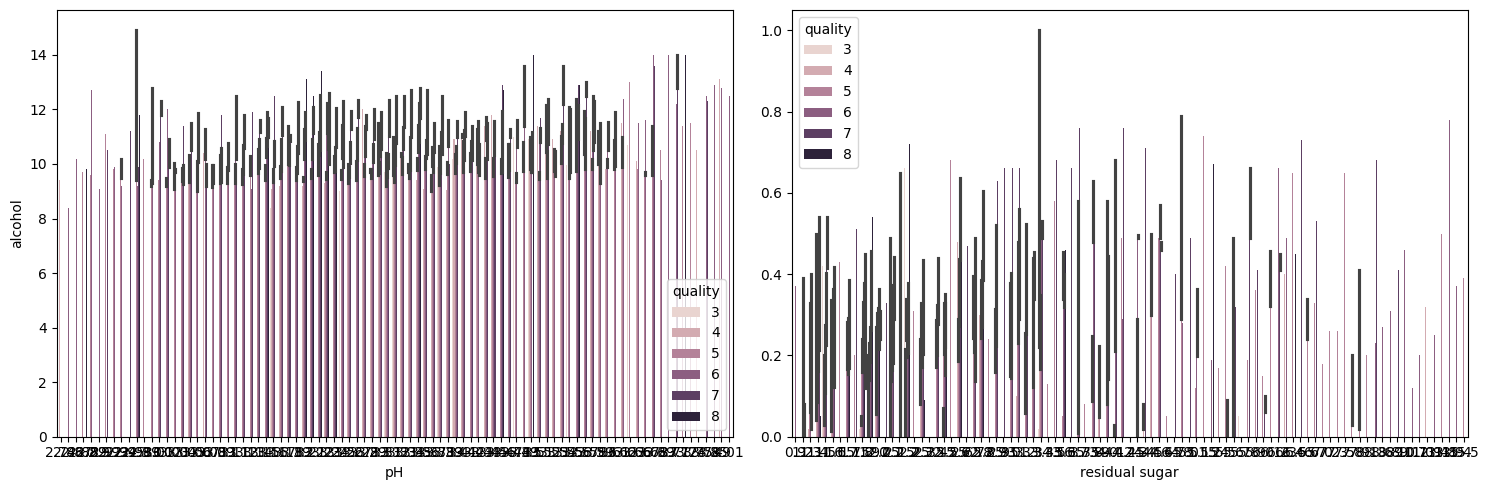

In [29]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "pH", y = "alcohol", hue = "quality")
sns.barplot(ax = axis[1], data = total_data, x = "residual sugar", y = "citric acid", hue = "quality").set(ylabel = None)


plt.tight_layout()

plt.show()

In [49]:
total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


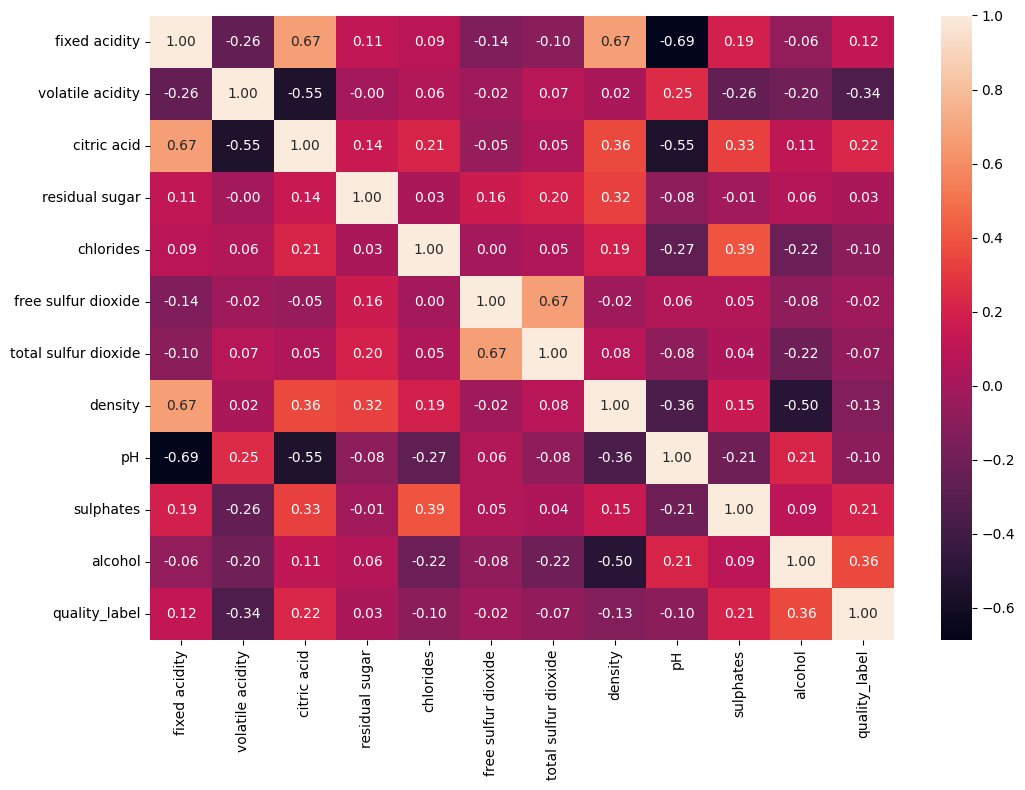

In [50]:
fig, axes = plt.subplots(figsize=(11, 8))

sns.heatmap(total_data[["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",
                        	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol",	"quality_label"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

In [51]:
total_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,1.089036
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.417075
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


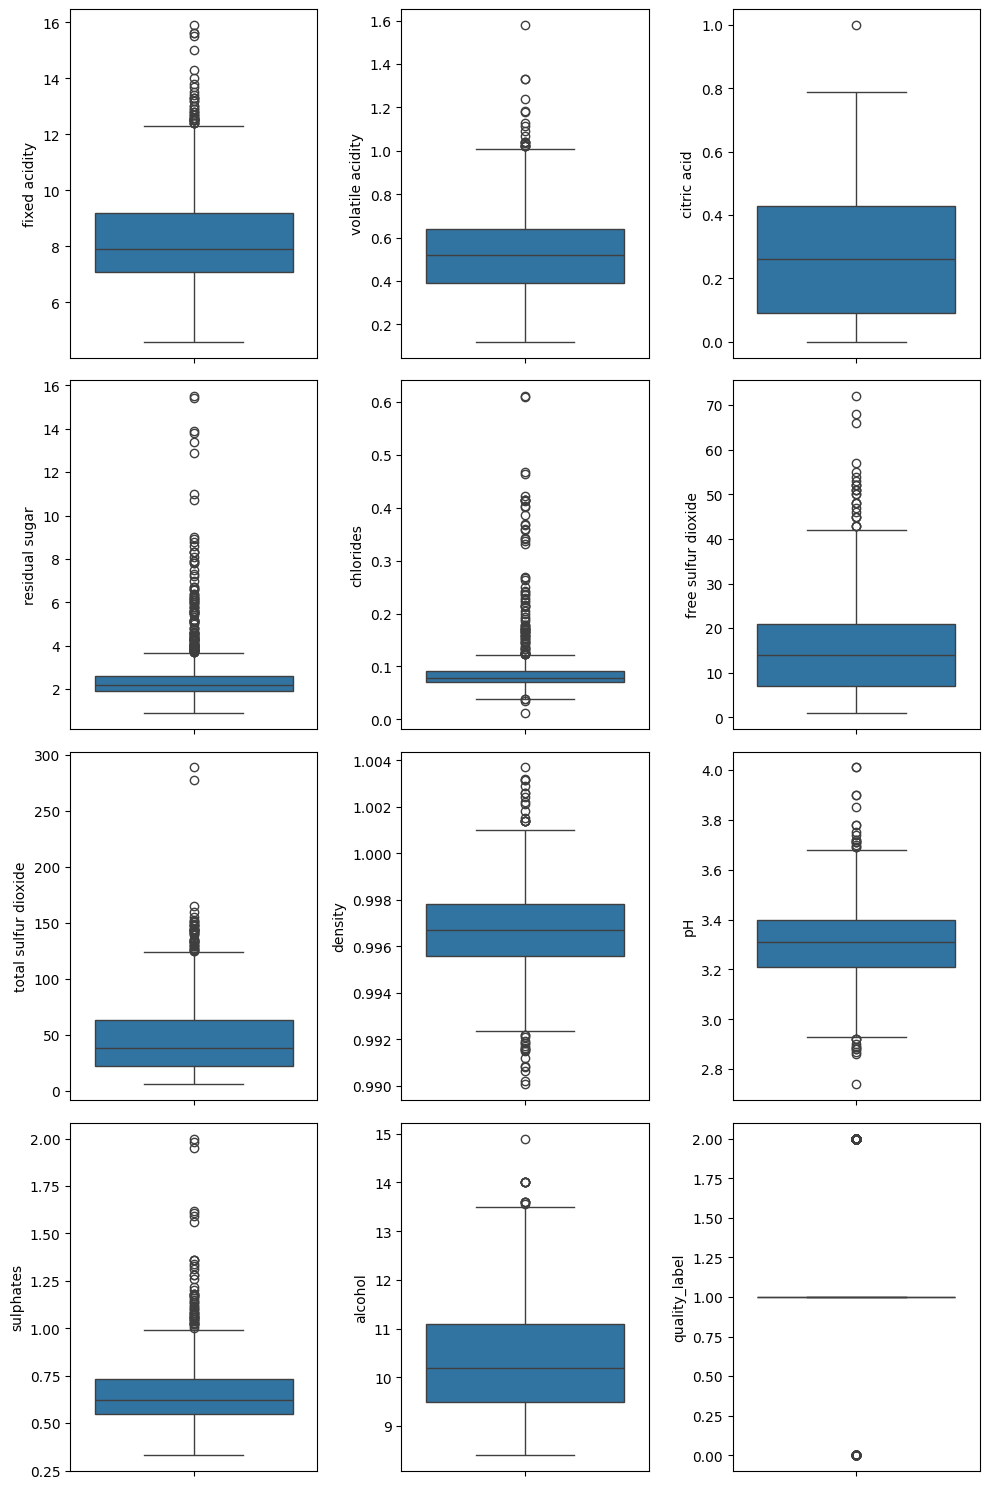

In [54]:
fig, axes = plt.subplots(4, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "fixed acidity")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "volatile acidity")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "citric acid")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "residual sugar")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "chlorides")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "free sulfur dioxide")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "total sulfur dioxide")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "density")
sns.boxplot(ax = axes[2, 2], data = total_data, y = "pH")
sns.boxplot(ax = axes[3, 0], data = total_data, y = "sulphates")
sns.boxplot(ax = axes[3, 1], data = total_data, y = "alcohol")
sns.boxplot(ax = axes[3, 2], data = total_data, y = "quality_label")






#fig.delaxes(axes[2, 1])
#fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

In [59]:
total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


In [64]:
data_CON_outliers = total_data.copy()

data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",
                        	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol",	"quality_label"]:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'fixed acidity': [np.float64(3.95), np.float64(12.349999999999998)],
 'volatile acidity': [np.float64(0.015000000000000013),
  np.float64(1.0150000000000001)],
 'citric acid': [0.0, np.float64(0.94)],
 'residual sugar': [np.float64(0.8499999999999996),
  np.float64(3.6500000000000004)],
 'chlorides': [np.float64(0.03850000000000002),
  np.float64(0.12249999999999998)],
 'free sulfur dioxide': [1.0, np.float64(42.0)],
 'total sulfur dioxide': [6.0, np.float64(124.5)],
 'density': [np.float64(0.99227), np.float64(1.00115)],
 'pH': [np.float64(2.925), np.float64(3.6849999999999996)],
 'sulphates': [np.float64(0.28000000000000014),
  np.float64(0.9999999999999999)],
 'alcohol': [np.float64(7.1000000000000005), np.float64(13.5)],
 'quality_label': [np.float64(1.0), np.float64(1.0)]}

In [65]:
data_CON_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [66]:
data_SIN_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0


In [67]:
data_CON_outliers.isnull().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_label           0
dtype: int64

In [68]:
data_SIN_outliers.isnull().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_label           0
dtype: int64

In [69]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality_label           0.0
dtype: float64

In [70]:
from sklearn.model_selection import train_test_split

num_variables = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",
                        	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = data_CON_outliers.drop("quality_label", axis = 1)[num_variables]
y = data_CON_outliers["quality_label"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = data_SIN_outliers.drop("quality_label", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0


In [71]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.351623,-0.828323,0.648771,-0.238440,-0.411606,-0.362070,-0.566298,-0.986612,-0.259822,0.519851,1.984240
1519,-0.981548,0.965891,-0.989833,0.054589,0.312800,-0.168479,-0.596342,-0.025508,0.857267,-0.458489,-0.215867
452,-0.865620,0.180922,-1.245865,-0.604727,-0.106593,0.218703,-0.355992,0.055032,0.857267,-0.170742,-0.399209
847,-0.517836,0.853753,-0.580182,-0.531470,-0.220973,-0.362070,-0.235817,0.538268,1.251534,0.232104,-0.490880
58,-0.285980,0.349130,-0.477769,-0.165183,-0.259100,0.121907,0.214839,0.430882,0.791556,-0.400940,-0.399209


In [72]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.380531,0.154930,0.40,0.089041,0.093489,0.154930,0.077739,0.351689,0.456897,0.251497,0.646154
1519,0.176991,0.380282,0.08,0.116438,0.156928,0.183099,0.074205,0.483113,0.603448,0.149701,0.276923
452,0.194690,0.281690,0.03,0.054795,0.120200,0.239437,0.102473,0.494126,0.603448,0.179641,0.246154
847,0.247788,0.366197,0.16,0.061644,0.110184,0.154930,0.116608,0.560206,0.655172,0.221557,0.230769
58,0.283186,0.302817,0.18,0.095890,0.106845,0.225352,0.169611,0.545521,0.594828,0.155689,0.246154


In [74]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 27.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [75]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)